In [1]:
import pandas as pd
from pandas import DataFrame
import csv
df_organic = pd.read_csv("halo_catalogue_organic_new.txt", delim_whitespace=True, header=None, skiprows=(0, 0), names=['Index','Time (Gyr)','a_exp','redshift','subhalo centre X','subhalo centre Y','subhalo centre Z','subhalo peculiar velocity X','subhalo peculiar velocity Y','subhalo peculiar velocity Z','Halo mass','Stellar mass','BH mass','SFR','sSFR'] )
df_early = pd.read_csv("halo_catalogue_gm_early_new.txt", delim_whitespace=True, header=None, skiprows=(0, 0), names=['Index','Time (Gyr)','a_exp','redshift','subhalo centre X','subhalo centre Y','subhalo centre Z','subhalo peculiar velocity X','subhalo peculiar velocity Y','subhalo peculiar velocity Z','Halo mass','Stellar mass','BH mass','SFR','sSFR'] )
df_late = pd.read_csv("halo_catalogue_gm_late_new.txt", delim_whitespace=True, header=None, skiprows=(0, 0), names=['Index','Time (Gyr)','a_exp','redshift','subhalo centre X','subhalo centre Y','subhalo centre Z','subhalo peculiar velocity X','subhalo peculiar velocity Y','subhalo peculiar velocity Z','Halo mass','Stellar mass','BH mass','SFR','sSFR'] )
df_organic

,Index,Time (Gyr),a_exp,redshift,subhalo centre X,subhalo centre Y,subhalo centre Z,subhalo peculiar velocity X,subhalo peculiar velocity Y,subhalo peculiar velocity Z,Halo mass,Stellar mass,BH mass,SFR,sSFR
0,5,0.760,0.124,7.050,5.600,1.329,4.347,-35.168,-168.075,-36.773,4.629300e+09,2.020900e+07,734810.0,0.20234,1.001300e-08
1,6,0.942,0.143,5.971,6.364,1.117,5.205,-30.115,-70.994,-148.108,7.589400e+09,3.568900e+07,734810.0,0.17482,4.898500e-09
2,7,1.049,0.154,5.487,6.935,1.590,5.381,-41.249,-193.422,-43.126,1.472300e+10,7.787400e+07,734810.0,0.32177,4.131900e-09
3,8,1.168,0.166,5.037,7.448,1.681,5.777,-45.835,-195.636,-51.056,2.523900e+10,8.277200e+07,734810.0,0.10330,1.248100e-09
4,9,1.348,0.182,4.485,8.070,1.381,6.541,-38.917,-79.613,-178.890,3.533900e+10,1.012500e+08,734810.0,0.42773,4.224600e-09
5,10,1.556,0.201,3.984,8.877,1.505,7.155,-41.672,-77.190,-182.936,3.901100e+10,1.435300e+08,734810.0,0.18617,1.297100e-09
6,11,1.795,0.221,3.528,9.762,1.641,7.832,-59.219,-86.418,-182.991,5.193900e+10,2.225500e+08,1469900.0,0.28082,1.261800e-09
7,12,2.144,0.249,3.017,11.132,2.252,8.603,-63.162,-255.758,-68.888,8.277600e+10,4.298200e+08,734810.0,1.19780,2.786700e-09
8,13,2.653,0.287,2.478,12.856,2.360,9.872,-74.110,-165.371,-133.448,1.882900e+11,4.006300e+08,2215600.0,0.39553,9.872700e-10
9,14,2.949,0.309,2.237,13.788,2.465,10.567,-97.686,-157.335,-121.338,3.143700e+11,7.989200e+08,2951600.0,1.28070,1.603000e-09


<function matplotlib.pyplot.show>

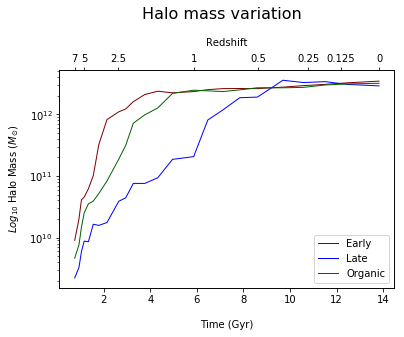

In [64]:
# Halo Mass plots
# To do:
# deviation

import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import z_at_value

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()


# Plot instructions 
ax1.plot(df_early['Time (Gyr)'],df_early['Halo mass'], linewidth=1, color='maroon', label='Early')

ax1.plot(df_late['Time (Gyr)'],df_late['Halo mass'], linewidth=1, color='blue', label='Late')

ax1.plot(df_organic['Time (Gyr)'],df_organic['Halo mass'], linewidth=1, color='darkgreen', label='Organic')
ax1.set_xlabel('Time (Gyr)', rotation=0, labelpad=15)
ax1.set_ylabel('$Log_{10}$ Halo Mass ($M_{\odot}$)', rotation=90, labelpad=8)


# Define a flat Lambda-CDM cosmology with parameters mentioned in Schaye et al. 2015
cosmology = FlatLambdaCDM(100.*0.6777,Om0=0.307,Ob0=0.04825)
zvals = np.array([0.0,0.125,0.25,0.5,1.0,2.5,5.0,7.0]) # Redshift tick values
time_in_Gyr = cosmology.age(zvals).value  # Lookback time corresponding to redshift tick values
ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
ax2.set_xlabel('Redshift', rotation=0, labelpad=8)


# Plot the y-axis on a log scale
plt.yscale("log")


# Add a legend using the labels in the df plot lines above
ax1.legend()

# Add a plot title
fig.suptitle('Halo mass variation', fontsize=16, y=1.1)


# Show plot
plt.show

# OPTIONAL FORMATTING
#ax = plt.axes()
#ax.set_facecolor("grey")
#plt.grid(color='red', linestyle='-.', linewidth=0.7)
#x_ticks = np.arange(0, 15, 1)
#plt.xticks(x_ticks)


<function matplotlib.pyplot.show>

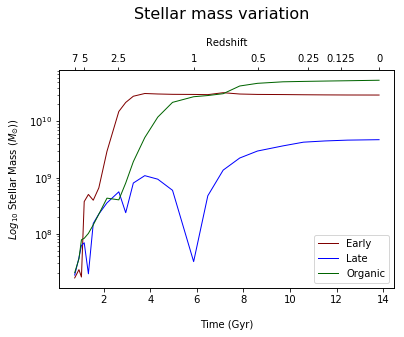

In [67]:
# Stellar Mass
# To do:
# deviation

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

# Plot instructions 
ax1.plot(df_early['Time (Gyr)'],df_early['Stellar mass'], linewidth=1, color='maroon', label='Early')

ax1.plot(df_late['Time (Gyr)'],df_late['Stellar mass'], linewidth=1, color='blue', label='Late')

ax1.plot(df_organic['Time (Gyr)'],df_organic['Stellar mass'], linewidth=1, color='darkgreen', label='Organic')
ax1.set_xlabel('Time (Gyr)', rotation=0, labelpad=15)
ax1.set_ylabel('$Log_{10}$ Stellar Mass ($M_{\odot}$))', rotation=90, labelpad=8)

# Define a flat Lambda-CDM cosmology with parameters mentioned in Schaye et al. 2015
cosmology = FlatLambdaCDM(100.*0.6777,Om0=0.307,Ob0=0.04825)
zvals = np.array([0.0,0.125,0.25,0.5,1.0,2.5,5.0,7.0]) # Redshift tick values
time_in_Gyr = cosmology.age(zvals).value  # Lookback time corresponding to redshift tick values
ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
ax2.set_xlabel('Redshift', rotation=0, labelpad=8)

# Plot the y-axis on a log scale
plt.yscale("log")

# Add a legend using the labels in the df plot lines above
ax1.legend()

# Add a plot title
fig.suptitle('Stellar mass variation', fontsize=16, y=1.1)

# Show plot
plt.show



<function matplotlib.pyplot.show>

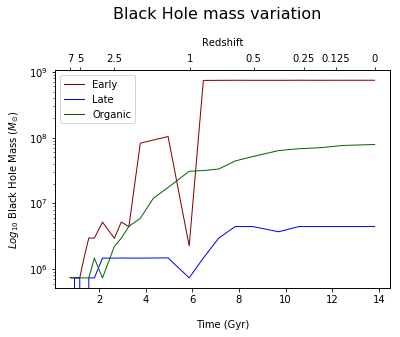

In [68]:
# Black Hole Mass
# To do:
# deviation

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

# Plot instructions 
ax1.plot(df_early['Time (Gyr)'],df_early['BH mass'], linewidth=1, color='maroon', label='Early')

ax1.plot(df_late['Time (Gyr)'],df_late['BH mass'], linewidth=1, color='blue', label='Late')

ax1.plot(df_organic['Time (Gyr)'],df_organic['BH mass'], linewidth=1, color='darkgreen', label='Organic')
ax1.set_xlabel('Time (Gyr)', rotation=0, labelpad=15)
ax1.set_ylabel('$Log_{10}$ Black Hole Mass ($M_{\odot}$)', rotation=90, labelpad=8)

# Define a flat Lambda-CDM cosmology with parameters mentioned in Schaye et al. 2015
cosmology = FlatLambdaCDM(100.*0.6777,Om0=0.307,Ob0=0.04825)
zvals = np.array([0.0,0.125,0.25,0.5,1.0,2.5,5.0,7.0]) # Redshift tick values
time_in_Gyr = cosmology.age(zvals).value  # Lookback time corresponding to redshift tick values
ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
ax2.set_xlabel('Redshift', rotation=0, labelpad=8)

# Plot the y-axis on a log scale
plt.yscale("log")

# Add a legend using the labels in the df plot lines above
ax1.legend()

# Add a plot title
fig.suptitle('Black Hole mass variation', fontsize=16, y=1.1)

# Show plot
plt.show


In [ ]:
# How to plot peculiar velocity when I have three columns X, Y, Z?

<function matplotlib.pyplot.show>

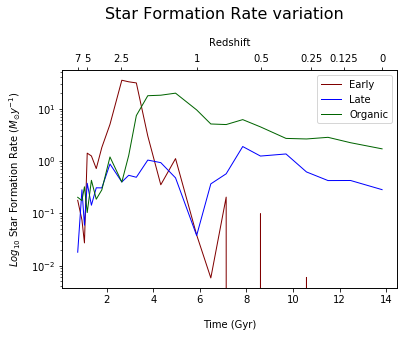

In [69]:
# Star formation rate
# To do:
# deviation
# change scale so early types fit in plot

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

# Plot instructions 
ax1.plot(df_early['Time (Gyr)'],df_early['SFR'], linewidth=1, color='maroon', label='Early')

ax1.plot(df_late['Time (Gyr)'],df_late['SFR'], linewidth=1, color='blue', label='Late')

ax1.plot(df_organic['Time (Gyr)'],df_organic['SFR'], linewidth=1, color='darkgreen', label='Organic')
ax1.set_xlabel('Time (Gyr)', rotation=0, labelpad=15)
ax1.set_ylabel('$Log_{10}$ Star Formation Rate ($M_{\odot} y^{-1}$)', rotation=90, labelpad=8)

# Define a flat Lambda-CDM cosmology with parameters mentioned in Schaye et al. 2015
cosmology = FlatLambdaCDM(100.*0.6777,Om0=0.307,Ob0=0.04825)
zvals = np.array([0.0,0.125,0.25,0.5,1.0,2.5,5.0,7.0]) # Redshift tick values
time_in_Gyr = cosmology.age(zvals).value  # Lookback time corresponding to redshift tick values
ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
ax2.set_xlabel('Redshift', rotation=0, labelpad=8)

# Plot the y-axis on a log scale
plt.yscale("log")

# Add a legend using the labels in the df plot lines above
ax1.legend()

# Add a plot title
fig.suptitle('Star Formation Rate variation', fontsize=16, y=1.1)

# Show plot
plt.show




<function matplotlib.pyplot.show>

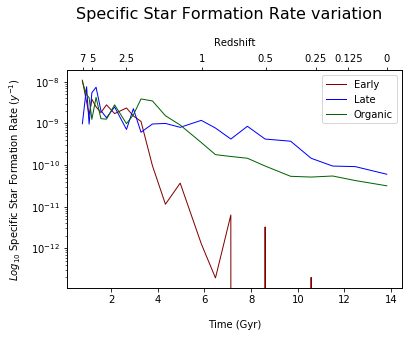

In [72]:
# Specific Star formation rate
# To do:
# deviation
# change scale so early types fit in plot


fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

# Plot instructions 
ax1.plot(df_early['Time (Gyr)'],df_early['sSFR'], linewidth=1, color='maroon', label='Early')

ax1.plot(df_late['Time (Gyr)'],df_late['sSFR'], linewidth=1, color='blue', label='Late')

ax1.plot(df_organic['Time (Gyr)'],df_organic['sSFR'], linewidth=1, color='darkgreen', label='Organic')
ax1.set_xlabel('Time (Gyr)', rotation=0, labelpad=15)
ax1.set_ylabel('$Log_{10}$ Specific Star Formation Rate ($y^{-1}$)', rotation=90, labelpad=8)

# Define a flat Lambda-CDM cosmology with parameters mentioned in Schaye et al. 2015
cosmology = FlatLambdaCDM(100.*0.6777,Om0=0.307,Ob0=0.04825)
zvals = np.array([0.0,0.125,0.25,0.5,1.0,2.5,5.0,7.0]) # Redshift tick values
time_in_Gyr = cosmology.age(zvals).value  # Lookback time corresponding to redshift tick values
ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
ax2.set_xlabel('Redshift', rotation=0, labelpad=8)

# Plot the y-axis on a log scale
plt.yscale("log")


# Add a legend using the labels in the df plot lines above
ax1.legend()

# Add a plot title
fig.suptitle('Specific Star Formation Rate variation', fontsize=16, y=1.1)

# Show plot
plt.show

